Using the `nycflights13` package/data, which three airlines performed the most flights in 2013.

Hints:  
- The `airlines` table provides the name of each airline
- Each row in the `flights` table represents one flight
- Use `group_by`, `summarize`,  and `arrange` 

In [1]:
library('tidyverse')
library('nycflights13')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [7]:
airlines |> head(2)
flights |> head(2)

carrier,name
<chr>,<chr>
9E,Endeavor Air Inc.
AA,American Airlines Inc.


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


Joining, by = "carrier"


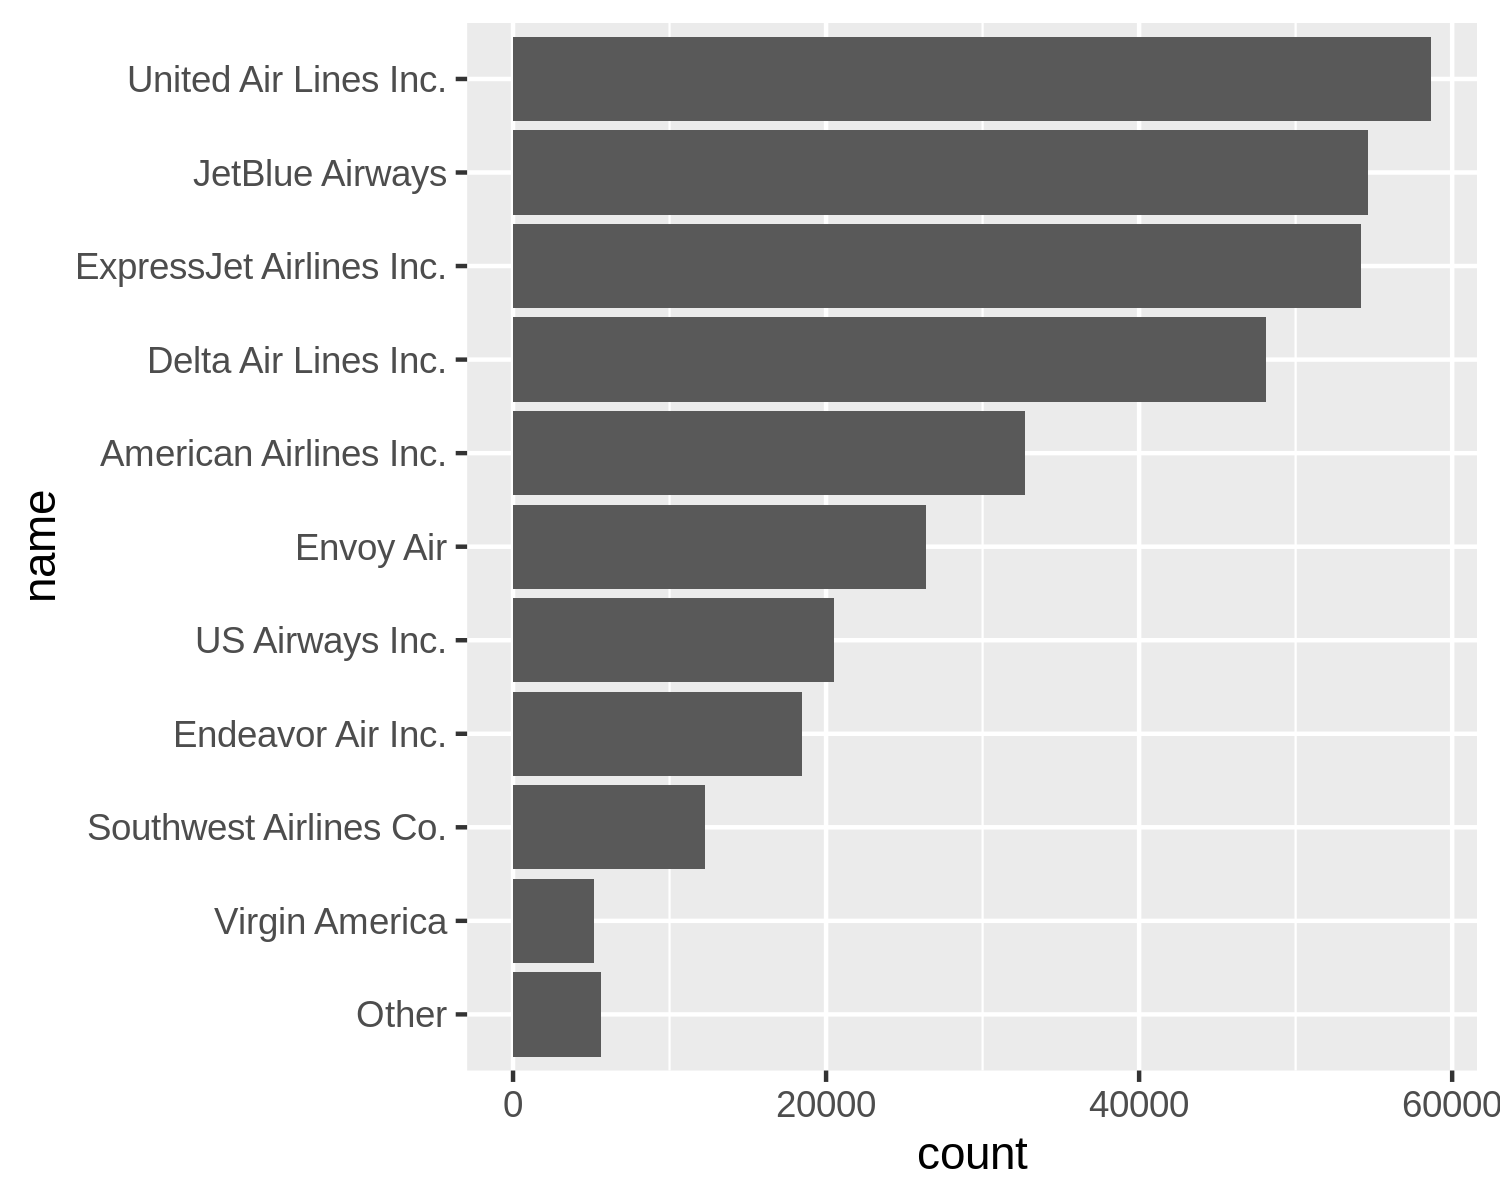

In [15]:
flights2 = flights |> 
    left_join(airlines) |>
    mutate(name = fct_infreq(name) |> 
                   fct_rev() |>
                   fct_lump(n = 10) |> 
                   fct_relevel('Other')
          ) 

p = ggplot(flights2, aes(y = name)) + geom_bar()

p

Re-create the following figure:

(*Hint: use* `forcats` *to lump and reorder by number of flights*)

<img src="figs/flights_bar.png" style="width: 600px;"/>